In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import  DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
    classification_report
from sklearn import tree

In [175]:
data = pd.read_excel('D:\\Data-science\\heart_disease.xlsx',sheet_name='Heart_disease')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [176]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [177]:
data['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [178]:
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].mean())

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [193]:
le = LabelEncoder()
data['restecg'] =data['restecg'].replace({'lv hypertrophy':0, 'normal':1,'st-t abnormality':2})
data['slope'] = data['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
data['thal'] = data['thal'].replace({'fixed defect':0, 'normal':1,'reversable defect':2})
data['cp'] = data['cp'].replace({'typical angina':0, 'atypical angina':1,'asymptomatic':2,'non-anginal':3})
data['sex'] = data['sex'].replace({'Female':0, 'Male':1})
data['fbs'] = data['fbs'].replace({True: 1,False: 0})
data['exang'] = data['exang'].replace({True: 1,False: 0,'FALSE':0,'TRUE':1,'TURE':1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        908 non-null    int64  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 92.3 KB


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        908 non-null    int64  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 92.3 KB


In [217]:
x = data.drop(columns=['num'])  # Features for predicting
y = data['num']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [198]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.879120879120879


In [199]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class problems
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr') 

# Print the results
print("Accuracy:", accuracy)
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1-Score (weighted):", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.45604395604395603
Precision (weighted): 0.4452497856753176
Recall (weighted): 0.45604395604395603
F1-Score (weighted): 0.4500330270822073
ROC-AUC: 0.5558238645192977


[Text(0.47343294239183276, 0.9736842105263158, 'exang <= 0.5\ngini = 0.698\nsamples = 726\nvalue = [310.0, 217.0, 87.0, 90.0, 22.0]'),
 Text(0.18291200777831793, 0.9210526315789473, 'chol <= 42.5\ngini = 0.574\nsamples = 424\nvalue = [257, 90, 39, 28, 10]'),
 Text(0.32817247508507535, 0.9473684210526316, 'True  '),
 Text(0.05529897909577054, 0.868421052631579, 'thalch <= 105.0\ngini = 0.731\nsamples = 73\nvalue = [10, 26, 22, 13, 2]'),
 Text(0.02916869227029655, 0.8157894736842105, 'age <= 57.5\ngini = 0.651\nsamples = 13\nvalue = [1, 2, 1, 7, 2]'),
 Text(0.019445794846864366, 0.7631578947368421, 'thalch <= 93.5\ngini = 0.776\nsamples = 7\nvalue = [1, 1, 1, 2, 2]'),
 Text(0.01166747690811862, 0.7105263157894737, 'thalch <= 87.0\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 0, 2]'),
 Text(0.007778317938745746, 0.6578947368421053, 'oldpeak <= -0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0]'),
 Text(0.003889158969372873, 0.6052631578947368, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 

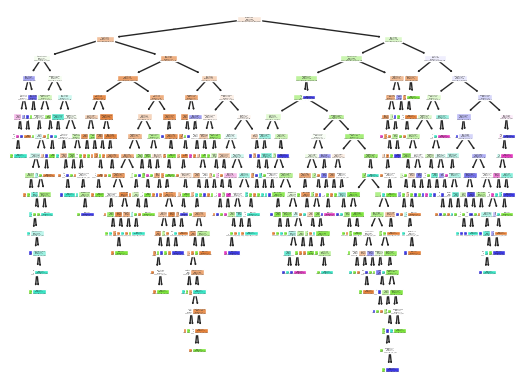

In [208]:
tree.plot_tree(model, feature_names=x.columns, filled=True)


#### Hyperparameter Tuning:

In [218]:
param_grid = {
    'max_depth': [3, 5, 10, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Test Accuracy: 0.5384615384615384


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
86 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params


In [220]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)
print(f"Best Parameters: {random_search.best_params_}")
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 3, 'criterion': 'gini'}
Test Accuracy: 0.5604395604395604


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
   

In [224]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.70      0.68        89
           1       0.27      0.27      0.27        48
           2       0.33      0.27      0.30        22
           3       0.12      0.12      0.12        17
           4       0.00      0.00      0.00         6

    accuracy                           0.46       182
   macro avg       0.28      0.27      0.27       182
weighted avg       0.45      0.46      0.45       182

